In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
wine = pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\PCA\\wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


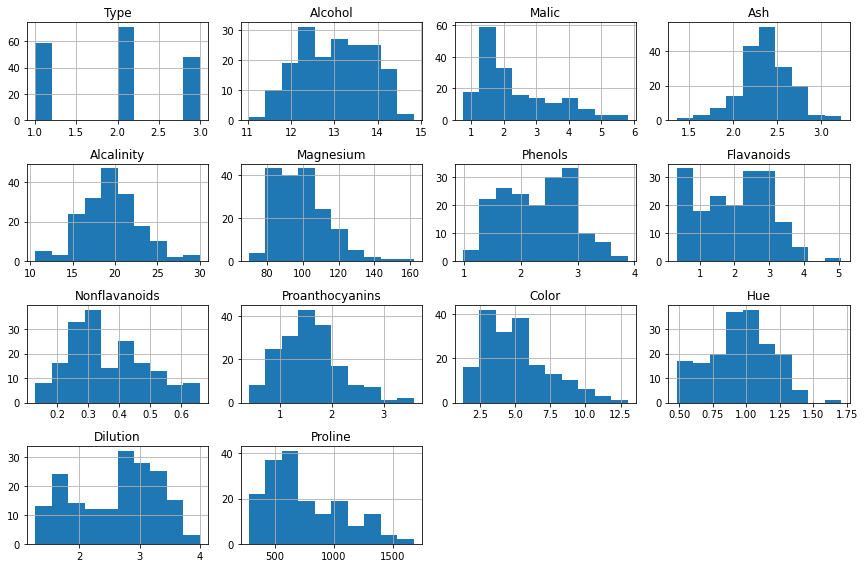

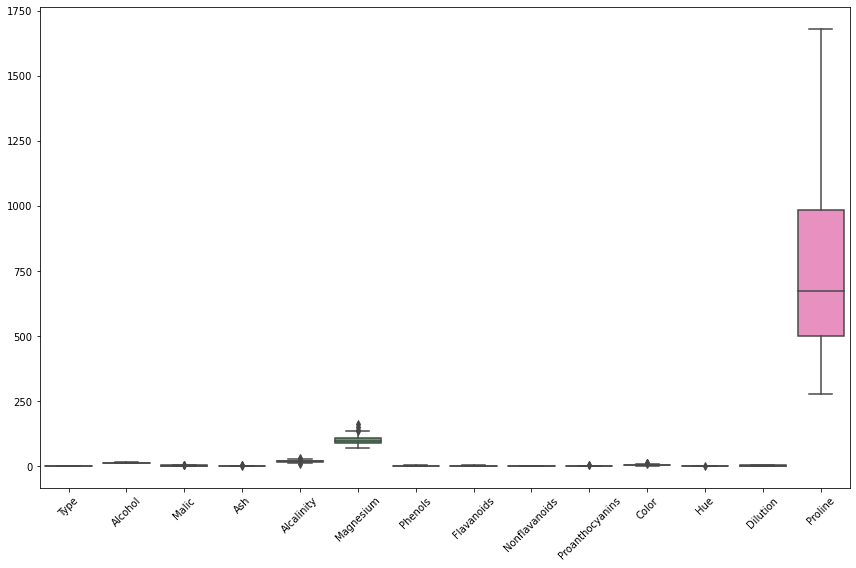

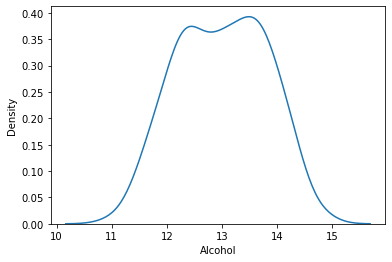

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numerical features
wine.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Density plots for specific features (example: 'Alcohol')
sns.kdeplot(wine['Alcohol'])
plt.show()

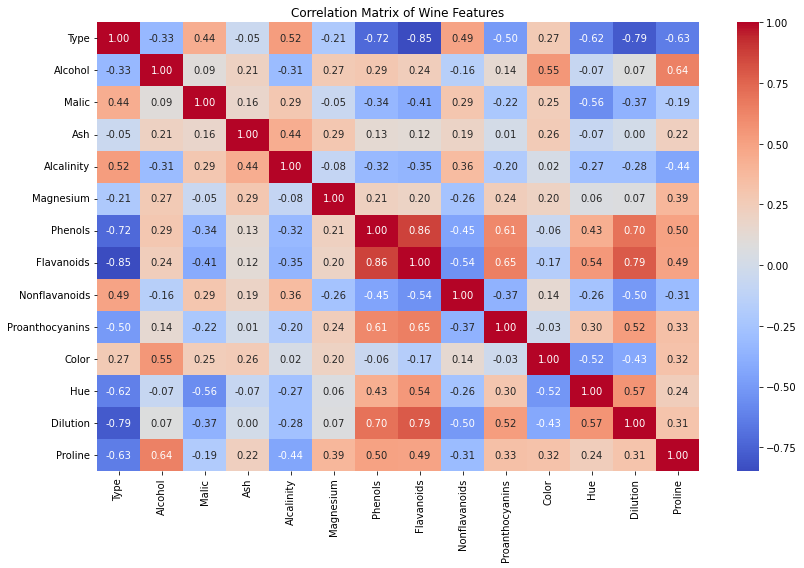

In [5]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = wine.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

In [6]:
# Normalizing the numerical data
wine_normal = scale(wine)

In [7]:
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [9]:
wine_values = pd.DataFrame(pca_values)
wine_values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626,-0.125419,0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588,0.055341,0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545,-0.027881,0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512,0.048784,-0.479793,0.313786,0.344120,-0.109515,0.102823


In [10]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [11]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

In [12]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42])

In [13]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [ 0.00569041,  0.48416087,  0.22359095,  0.31585588, -0.01161574,
         0.30055143,  0.06711983, -0.00131345,  0.0269887 ,  0.04122256,
         0.52978274, -0.27790735, -0.16277625,  0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

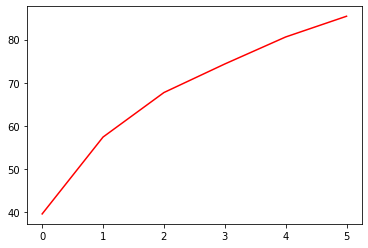

In [14]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

In [15]:
 pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

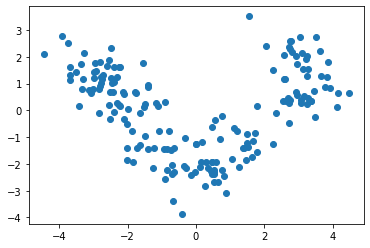

In [16]:
# plot between PCA1 and PCA2
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [17]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

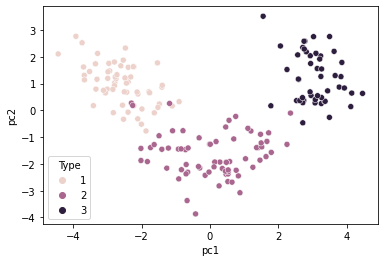

In [18]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')